In [1]:
import pandas as pd
import numpy as np
import scanpy as sc

/home/debnatho/anaconda3/envs/trajectory_analysis_R/lib/python3.6/site-packages/anndata/core/anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.logging.print_versions() 

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.4.1 numpy==1.18.1 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.7.1 louvain==0.6.1


In [3]:
results= "./placenta_umap_reproduced/Placenta_integrated_scanpy_umap.h5ad"

In [4]:
#Read the anndata (based on Seurat integration):
adata= sc.read_h5ad(results)

adata

AnnData object with n_obs × n_vars = 101031 × 4311 
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'integrated_snn_res.0.5', 'seurat_clusters', 'group', 'disease', 'time', 'tissue', 'tissue_time', 'integrated_snn_res.1', 'integrated_snn_res.2', 'integrated_snn_res.3', 'cell_type', 'RNA_snn_res.0.8', 'Merged_cell_type_PC35', 'cell_type_merged', 'sub_cluster', 'sub_cluster_final', 'cell_type_semifinal', 'cell_type_semifinal_v2'
    uns: 'cell_type_semifinal_colors', 'cell_type_semifinal_v2_colors', 'neighbors'
    obsm: 'X_pca', 'X_umap'

In [5]:
adata.obs['group'].value_counts() 

Late_Villi_C       26431
Late_Villi_PE      22687
Early_Decidua_C    14506
Late_Decidua_C     13244
Late_Decidua_PE    12975
Early_Villi_C      11188
Name: group, dtype: int64

Calculate the density of cells in an embedding such as UMAP (per condition: "group" in our case).

Gaussian kernel density estimation is used to calculate the density of cells in an embedded space. This can be performed per category over a categorical cell annotation. The cell density can be plotted using the sc.pl.embedding_density() function.

The density values are scaled to be between 0 and 1.  A high density value imply strong contribution of the cells to the dataset (per condition). 

In [7]:
sc.settings.set_figure_params(dpi_save=800)

In [8]:
#Calculate UMAP density:
sc.tl.embedding_density(adata, basis='umap', groupby= 'group')

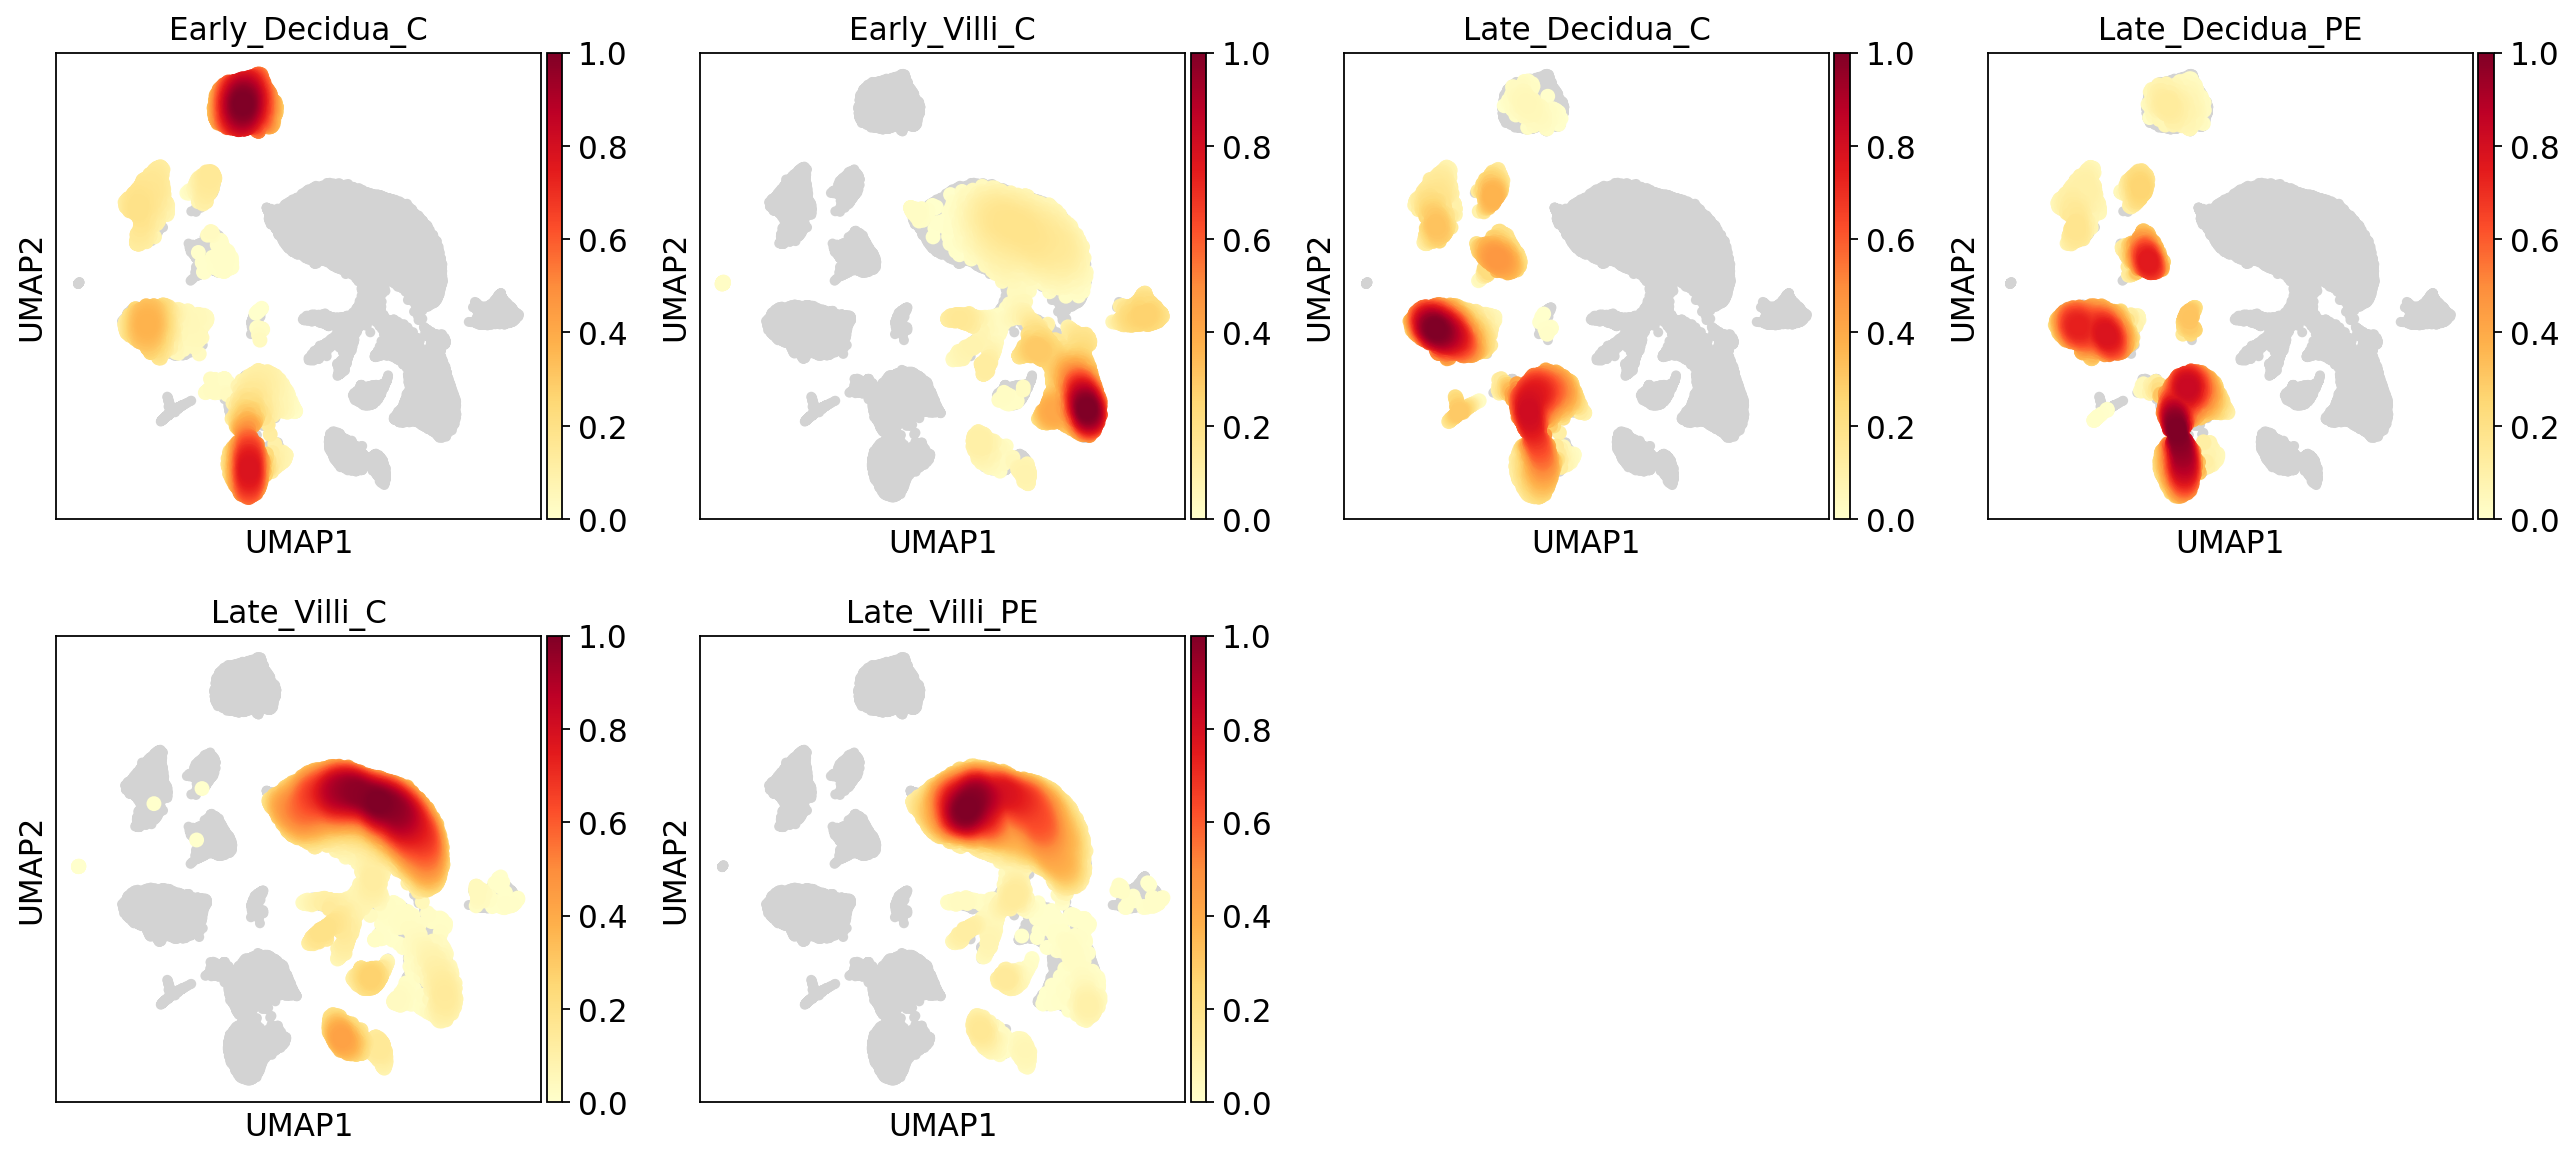

In [9]:
#Plot the kernel density: 
sc.pl.embedding_density(adata, basis='umap', key= 'umap_density_group') #save= '.pdf' => add to save as a pdf

We see that TSC(s), VCT (cytotrophoblast) & EVT (extravillous trophoblast) are significantly enriched in early & depleted in the late pregnancies & PE. On the other hand, SCT(s) are much more enhanced in late healthy as well as PE samples. 

There is a higher number of lymphoid dNK cells in the PE. 

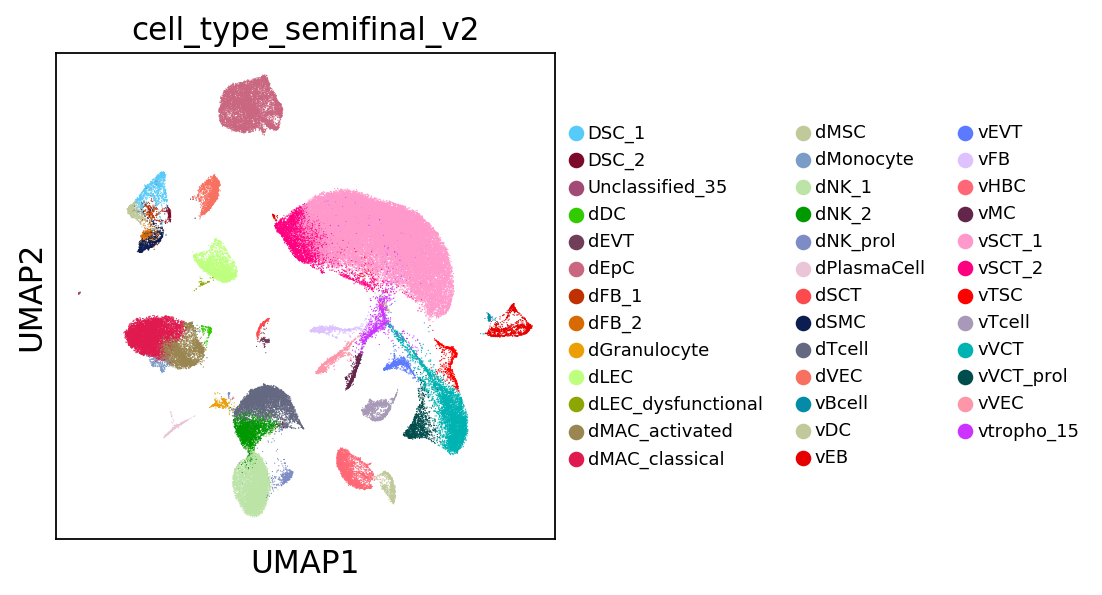

In [10]:
sc.pl.umap(adata, color= ['cell_type_semifinal_v2'], legend_fontsize= 'xx-small', 
           legend_fontweight= 'light') #cell_annotation/names finalized later. 